<a href="https://colab.research.google.com/github/Aishaamalik/Climate-Change-Prediction/blob/main/PROJECT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLIMATE CHANGE DATA
----


# 1: Exploration

## 1: IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2: FUNCTION TO LOAD & EXPLORE THE DATASET

In [10]:
def load_and_explore_data(file_path='climate_change_dataset.csv'):
    """Load and explore the climate change dataset"""

    print("="*60)
    print("CLIMATE CHANGE DATA EXPLORATION")
    print("="*60)

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded successfully with shape: {df.shape}")

    print(f"\n2. Dataset Overview:")
    print(f"   - Rows: {len(df)}")
    print(f"   - Columns: {len(df.columns)}")
    print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print(f"\n3. Column Information:")
    print(df.info())

    print(f"\n4. First 5 rows:")
    print(df.head())

    print(f"\n5. Statistical Summary:")
    print(df.describe())

    print(f"\n6. Missing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✓ No missing values found!")
    else:
        print(missing_values[missing_values > 0])

    print(f"\n7. Unique values per column:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"   {col}: {unique_count} unique values")

        if df[col].dtype == 'object' and unique_count <= 20:
            print(f"      Values: {list(df[col].unique())}")

    return df
df = load_and_explore_data()

CLIMATE CHANGE DATA EXPLORATION

1. Loading dataset...
✓ Dataset loaded successfully with shape: (1000, 10)

2. Dataset Overview:
   - Rows: 1000
   - Columns: 10
   - Memory usage: 0.13 MB

3. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non

## 3: Analyze Countries and Time Period

In [11]:
def analyze_country_year(df):
    print(f"\n8. Countries in dataset:")
    country_counts = df['Country'].value_counts()
    print(f"   Total countries: {len(country_counts)}")
    print(f"   Records per country:")
    print(country_counts)

    print(f"\n9. Time period analysis:")
    print(f"   Year range: {df['Year'].min()} - {df['Year'].max()}")
    print(f"   Total years covered: {df['Year'].nunique()}")
    year_counts = df['Year'].value_counts().sort_index()
    print(f"   Records per year range:")
    print(f"   Min records in a year: {year_counts.min()}")
    print(f"   Max records in a year: {year_counts.max()}")
    print(f"   Average records per year: {year_counts.mean():.1f}")
analyze_country_year(df)


8. Countries in dataset:
   Total countries: 15
   Records per country:
Country
Indonesia       75
Russia          74
USA             73
South Africa    73
India           70
China           67
Argentina       67
Canada          67
Brazil          67
France          66
UK              65
Japan           63
Germany         61
Australia       57
Mexico          55
Name: count, dtype: int64

9. Time period analysis:
   Year range: 2000 - 2023
   Total years covered: 24
   Records per year range:
   Min records in a year: 30
   Max records in a year: 53
   Average records per year: 41.7


## 4: Climate Statistics Summary

In [13]:
def summarize_climate_stats(df):
    print(f"\n10. Key Climate Statistics:")

    print(f"    Temperature:")
    print(f"      - Average: {df['Avg Temperature (°C)'].mean():.2f}°C")
    print(f"      - Range: {df['Avg Temperature (°C)'].min():.2f}°C to {df['Avg Temperature (°C)'].max():.2f}°C")
    print(f"      - Standard deviation: {df['Avg Temperature (°C)'].std():.2f}°C")

    print(f"    CO2 Emissions:")
    print(f"      - Average: {df['CO2 Emissions (Tons/Capita)'].mean():.2f} tons/capita")
    print(f"      - Range: {df['CO2 Emissions (Tons/Capita)'].min():.2f} to {df['CO2 Emissions (Tons/Capita)'].max():.2f} tons/capita")

    print(f"    Renewable Energy:")
    print(f"      - Average: {df['Renewable Energy (%)'].mean():.2f}%")
    print(f"      - Range: {df['Renewable Energy (%)'].min():.2f}% to {df['Renewable Energy (%)'].max():.2f}%")

    print(f"    Forest Area:")
    print(f"      - Average: {df['Forest Area (%)'].mean():.2f}%")
    print(f"      - Range: {df['Forest Area (%)'].min():.2f}% to {df['Forest Area (%)'].max():.2f}%")
summarize_climate_stats(df)



10. Key Climate Statistics:
    Temperature:
      - Average: 19.88°C
      - Range: 5.00°C to 34.90°C
      - Standard deviation: 8.54°C
    CO2 Emissions:
      - Average: 10.43 tons/capita
      - Range: 0.50 to 20.00 tons/capita
    Renewable Energy:
      - Average: 27.30%
      - Range: 5.10% to 50.00%
    Forest Area:
      - Average: 40.57%
      - Range: 10.10% to 70.00%


## 5: Data Quality Checks

In [17]:
def check_data_quality(df):
    print(f"\n11. Data Quality Checks:")

    duplicates = df.duplicated().sum()
    print(f"    Duplicate rows: {duplicates}")

    negative_checks = {
        'CO2 Emissions (Tons/Capita)': (df['CO2 Emissions (Tons/Capita)'] < 0).sum(),
        'Renewable Energy (%)': (df['Renewable Energy (%)'] < 0).sum(),
        'Forest Area (%)': (df['Forest Area (%)'] < 0).sum(),
        'Population': (df['Population'] < 0).sum()
    }

    print(f"    Negative values check:")
    for col, count in negative_checks.items():
        print(f"      {col}: {count} negative values")

    print(f"    Range validation:")
    renewable_over_100 = (df['Renewable Energy (%)'] > 100).sum()
    forest_over_100 = (df['Forest Area (%)'] > 100).sum()
    print(f"      Renewable Energy > 100%: {renewable_over_100}")
    print(f"      Forest Area > 100%: {forest_over_100}")
check_data_quality(df)




11. Data Quality Checks:
    Duplicate rows: 0
    Negative values check:
      CO2 Emissions (Tons/Capita): 0 negative values
      Renewable Energy (%): 0 negative values
      Forest Area (%): 0 negative values
      Population: 0 negative values
    Range validation:
      Renewable Energy > 100%: 0
      Forest Area > 100%: 0


## 6: Correlation Analysis

In [19]:
def correlation_with_temperature(df):
    print(f"\n12. Quick Correlation Analysis:")
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    temp_correlations = df[numerical_cols].corr()['Avg Temperature (°C)'].sort_values(ascending=False)

    print(f"    Correlations with Temperature:")
    for col, corr in temp_correlations.items():
        if col != 'Avg Temperature (°C)':
            print(f"      {col}: {corr:.3f}")
correlation_with_temperature(df)




12. Quick Correlation Analysis:
    Correlations with Temperature:
      Sea Level Rise (mm): 0.059
      Extreme Weather Events: 0.035
      Year: 0.021
      CO2 Emissions (Tons/Capita): 0.012
      Population: 0.004
      Rainfall (mm): -0.005
      Forest Area (%): -0.017
      Renewable Energy (%): -0.065


## 7: Summary Report

In [20]:
def print_summary(df):
    summary = {
        'total_records': len(df),
        'total_columns': len(df.columns),
        'countries': df['Country'].nunique(),
        'year_range': f"{df['Year'].min()}-{df['Year'].max()}",
        'missing_values': df.isnull().sum().sum(),
        'duplicates': df.duplicated().sum(),
        'avg_temperature': df['Avg Temperature (°C)'].mean(),
        'avg_co2': df['CO2 Emissions (Tons/Capita)'].mean(),
        'avg_renewable': df['Renewable Energy (%)'].mean()
    }

    print(f"\n" + "="*50)
    print("EXPLORATION SUMMARY")
    print("="*50)
    for key, value in summary.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
print_summary(df)


EXPLORATION SUMMARY
Total Records: 1000
Total Columns: 10
Countries: 15
Year Range: 2000-2023
Missing Values: 0
Duplicates: 0
Avg Temperature: 19.8831
Avg Co2: 10.425799999999999
Avg Renewable: 27.3005


## 8: Creating Basic Plots


13. Creating basic exploratory plots...


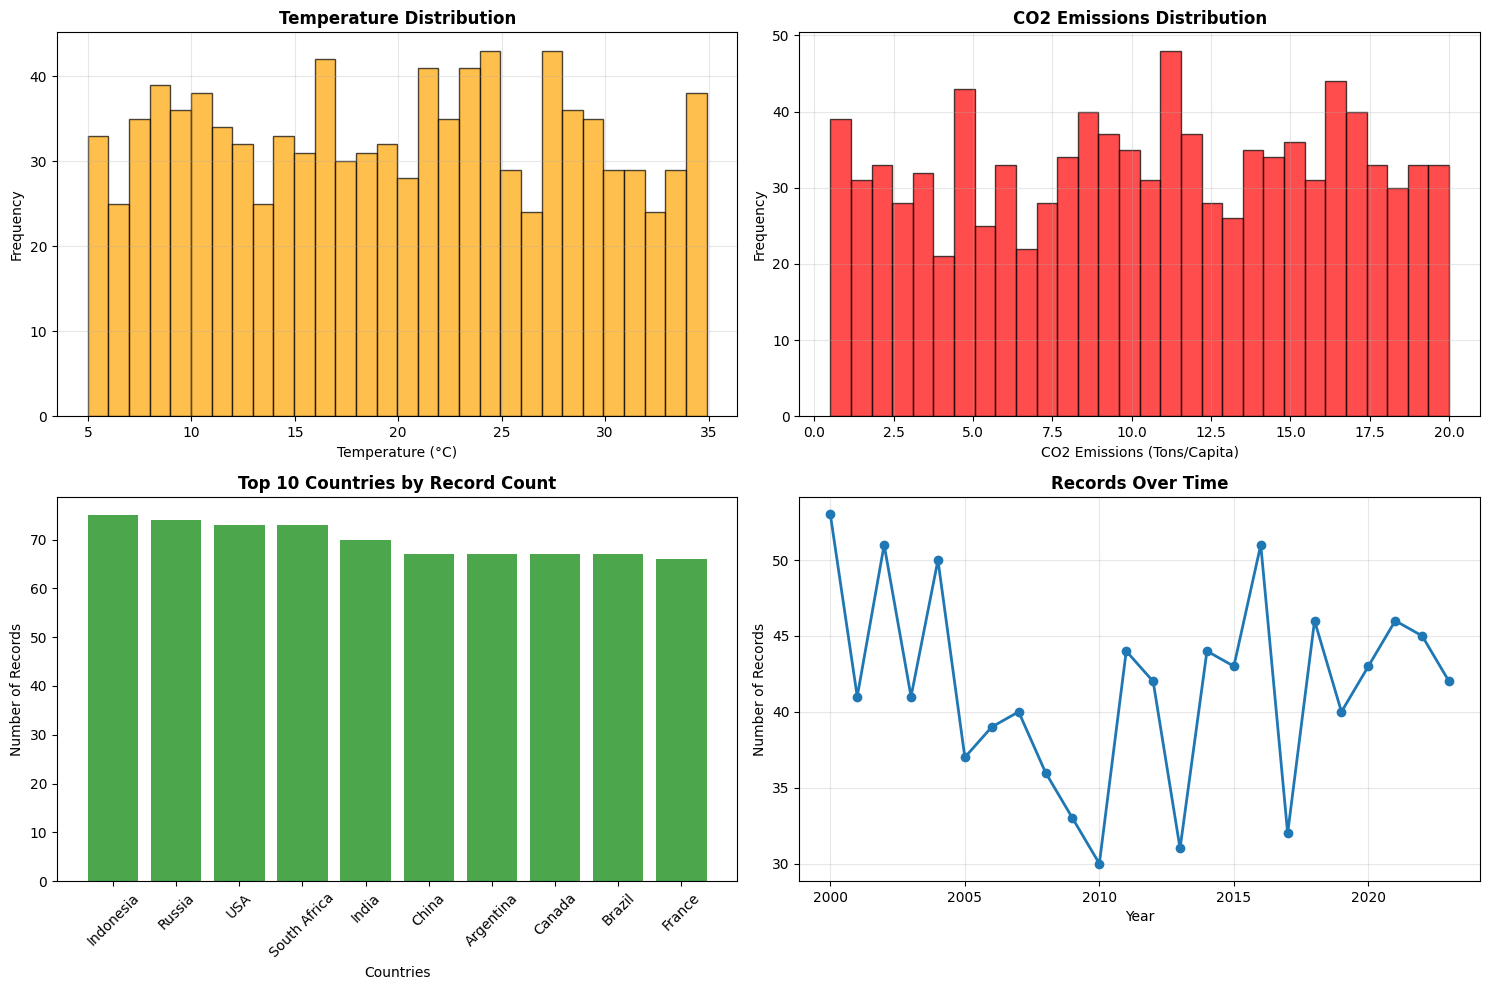

In [22]:
def create_basic_plots(df):
    print(f"\n13. Creating basic exploratory plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0, 0].hist(df['Avg Temperature (°C)'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 0].set_title('Temperature Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].hist(df['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[0, 1].set_title('CO2 Emissions Distribution', fontweight='bold')
    axes[0, 1].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

    top_countries = df['Country'].value_counts().head(10)
    axes[1, 0].bar(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
    axes[1, 0].set_title('Top 10 Countries by Record Count', fontweight='bold')
    axes[1, 0].set_xlabel('Countries')
    axes[1, 0].set_ylabel('Number of Records')
    axes[1, 0].set_xticks(range(len(top_countries)))
    axes[1, 0].set_xticklabels(top_countries.index, rotation=45)

    year_counts = df['Year'].value_counts().sort_index()
    axes[1, 1].plot(year_counts.index, year_counts.values, marker='o', linewidth=2)
    axes[1, 1].set_title('Records Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Records')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
create_basic_plots(df)



----

# 2: Data Cleaning and PreProcessing

### 1: IMPORT LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')


### 2: LOAD DATA

In [26]:
def load_data(file_path='climate_change_dataset.csv'):
    """Load the dataset for cleaning"""
    print("DATA CLEANING AND PREPROCESSING")

    print("\n1. Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded with shape: {df.shape}")
    return df
df_original = load_data()


DATA CLEANING AND PREPROCESSING

1. Loading dataset...
✓ Dataset loaded with shape: (1000, 10)


### 3: HANDLING MISSING VALUES

In [28]:

def handle_missing_values(df):
    """Handle missing values in the dataset"""
    print("\n2. Checking for missing values...")

    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    if missing_values.sum() == 0:
        print("✓ No missing values found!")
        return df, {}

    print("Missing values found:")
    missing_info = {}
    for col in missing_values[missing_values > 0].index:
        count = missing_values[col]
        percentage = missing_percentage[col]
        print(f"  {col}: {count} ({percentage:.2f}%)")
        missing_info[col] = {'count': count, 'percentage': percentage}

    df_clean = df.copy()
    strategies_applied = {}

    for col in missing_info.keys():
        if missing_info[col]['percentage'] < 5:
            if df[col].dtype in ['int64', 'float64']:
                median_val = df[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                strategies_applied[col] = f"Filled with median: {median_val:.2f}"
            else:
                mode_val = df[col].mode()[0]
                df_clean[col].fillna(mode_val, inplace=True)
                strategies_applied[col] = f"Filled with mode: {mode_val}"
        elif missing_info[col]['percentage'] < 15:
            df_clean[col].fillna(method='ffill', inplace=True)
            df_clean[col].fillna(method='bfill', inplace=True)
            strategies_applied[col] = "Forward/backward fill applied"
        else:
            if df[col].dtype == 'object':
                df_clean[col].fillna('Unknown', inplace=True)
                strategies_applied[col] = "Filled with 'Unknown'"
            else:
                df_clean[col].fillna(df[col].mean(), inplace=True)
                strategies_applied[col] = f"Filled with mean: {df[col].mean():.2f}"

    print("\nStrategies applied:")
    for col, strategy in strategies_applied.items():
        print(f"  {col}: {strategy}")

    return df_clean, strategies_applied
df_clean, missing_strategies = handle_missing_values(df_original)



2. Checking for missing values...
✓ No missing values found!


### 4: HANDLING DUPLICATES

In [29]:
def handle_duplicates(df):
    """Handle duplicate records"""
    print("\n3. Checking for duplicate records...")

    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()

    if duplicate_count == 0:
        print("✓ No duplicate records found!")
        return df, 0

    print(f"Found {duplicate_count} duplicate records")

    df_clean = df.drop_duplicates()

    print(f"✓ Removed {duplicate_count} duplicate records")
    print(f"Dataset shape after removing duplicates: {df_clean.shape}")

    return df_clean, duplicate_count
df_clean, duplicates_removed = handle_duplicates(df_clean)



3. Checking for duplicate records...
✓ No duplicate records found!


### 5: DETECT OUTLINERS

In [30]:
def detect_outliers(df):
    """Detect outliers using multiple methods"""
    print("\n4. Detecting outliers...")

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_info = {}

    for col in numerical_cols:
        if col in ['Year']:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

        z_scores = np.abs(stats.zscore(df[col]))
        z_outliers = df[z_scores > 3].index

        combined_outliers = list(set(iqr_outliers) | set(z_outliers))

        outliers_info[col] = {
            'count': len(combined_outliers),
            'percentage': (len(combined_outliers) / len(df)) * 100,
            'indices': combined_outliers,
            'bounds': {'lower': lower_bound, 'upper': upper_bound}
        }

        print(f"  {col}: {len(combined_outliers)} outliers ({outliers_info[col]['percentage']:.2f}%)")

    return outliers_info
outliers_info = detect_outliers(df_clean)


4. Detecting outliers...
  Avg Temperature (°C): 0 outliers (0.00%)
  CO2 Emissions (Tons/Capita): 0 outliers (0.00%)
  Sea Level Rise (mm): 0 outliers (0.00%)
  Rainfall (mm): 0 outliers (0.00%)
  Population: 0 outliers (0.00%)
  Renewable Energy (%): 0 outliers (0.00%)
  Extreme Weather Events: 0 outliers (0.00%)
  Forest Area (%): 0 outliers (0.00%)


### 6: HANDLE OUTLIERS

In [31]:

def handle_outliers(df, outliers_details, method='cap'):
    """Handle outliers in the dataset"""
    print(f"\n5. Handling outliers using {method} method...")

    df_clean = df.copy()
    outliers_handled = {}

    for col, details in outliers_details.items():
        if details['count'] == 0:
            continue

        if method == 'cap':
            lower_bound = details['bounds']['lower']
            upper_bound = details['bounds']['upper']

            original_count = len(df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)])

            df_clean[col] = np.clip(df_clean[col], lower_bound, upper_bound)

            outliers_handled[col] = f"Capped {original_count} values to [{lower_bound:.2f}, {upper_bound:.2f}]"

        elif method == 'remove':
            mask = ~df_clean.index.isin(details['indices'])
            df_clean = df_clean[mask]
            outliers_handled[col] = f"Removed {len(details['indices'])} outlier rows"

    print("Outliers handled:")
    for col, action in outliers_handled.items():
        print(f"  {col}: {action}")

    return df_clean, outliers_handled
df_clean, outliers_handled = handle_outliers(df_clean, outliers_info, method='cap')



5. Handling outliers using cap method...
Outliers handled:


###  7: VALIDATE DATA RANGES

In [32]:

def validate_data_ranges(df):
    """Validate data ranges and fix unrealistic values"""
    print("\n6. Validating data ranges...")

    validation_issues = {}
    df_clean = df.copy()

    temp_col = 'Avg Temperature (°C)'
    if temp_col in df.columns:
        extreme_temps = df_clean[(df_clean[temp_col] < -50) | (df_clean[temp_col] > 50)]
        if len(extreme_temps) > 0:
            validation_issues[temp_col] = f"Found {len(extreme_temps)} extreme temperature values"
            print(f"  Warning: {len(extreme_temps)} extreme temperature values found")

    percentage_cols = ['Renewable Energy (%)', 'Forest Area (%)']
    for col in percentage_cols:
        if col in df.columns:
            invalid_percent = df_clean[(df_clean[col] < 0) | (df_clean[col] > 100)]
            if len(invalid_percent) > 0:
                validation_issues[col] = f"Found {len(invalid_percent)} invalid percentage values"
                print(f"  Warning: {len(invalid_percent)} invalid percentage values in {col}")
                df_clean[col] = np.clip(df_clean[col], 0, 100)

    pop_col = 'Population'
    if pop_col in df.columns:
        negative_pop = df_clean[df_clean[pop_col] <= 0]
        if len(negative_pop) > 0:
            validation_issues[pop_col] = f"Found {len(negative_pop)} negative/zero population values"
            print(f"  Warning: {len(negative_pop)} negative/zero population values")

    co2_col = 'CO2 Emissions (Tons/Capita)'
    if co2_col in df.columns:
        negative_co2 = df_clean[df_clean[co2_col] < 0]
        if len(negative_co2) > 0:
            validation_issues[co2_col] = f"Found {len(negative_co2)} negative CO2 values"
            print(f"  Warning: {len(negative_co2)} negative CO2 emission values")
            df_clean.loc[df_clean[co2_col] < 0, co2_col] = 0

    if not validation_issues:
        print("✓ All data ranges are valid!")

    return df_clean, validation_issues
df_clean, validation_issues = validate_data_ranges(df_clean)



6. Validating data ranges...
✓ All data ranges are valid!


### 8: FIX DATA QUALITY ISSSUES

In [33]:

def fix_data_issues(df):
    """Fix specific data quality issues"""
    print("\n7. Fixing data quality issues...")

    df_clean = df.copy()
    fixes_applied = []

    if 'Year' in df.columns:
        if df_clean['Year'].dtype == 'object':
            df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')
            fixes_applied.append("Converted Year column to numeric")

    if 'Country' in df.columns:
        df_clean['Country'] = df_clean['Country'].str.strip()
        original_countries = df_clean['Country'].nunique()

        country_counts_before = len(df_clean['Country'].unique())
        df_clean['Country'] = df_clean['Country'].str.title()
        country_counts_after = len(df_clean['Country'].unique())

        if country_counts_before != country_counts_after:
            fixes_applied.append(f"Standardized country names: {country_counts_before} -> {country_counts_after}")

    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col == 'Year' or col == 'Population':
            df_clean[col] = df_clean[col].round(0).astype('int64')
        elif 'Temperature' in col:
            df_clean[col] = df_clean[col].round(1)
        elif '%' in col:
            df_clean[col] = df_clean[col].round(1)
        else:
            df_clean[col] = df_clean[col].round(2)

    fixes_applied.append("Rounded numerical values to appropriate decimal places")

    if 'Sea Level Rise (mm)' in df_clean.columns:
        extreme_sea_level = df_clean[df_clean['Sea Level Rise (mm)'] > 10]
        if len(extreme_sea_level) > 0:
            median_sea_level = df_clean['Sea Level Rise (mm)'].median()
            df_clean.loc[df_clean['Sea Level Rise (mm)'] > 10, 'Sea Level Rise (mm)'] = median_sea_level
            fixes_applied.append(f"Fixed {len(extreme_sea_level)} extreme sea level rise values")

    print("Data quality fixes applied:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    return df_clean, fixes_applied
df_clean, fixes_applied = fix_data_issues(df_clean)



7. Fixing data quality issues...
Data quality fixes applied:
  ✓ Rounded numerical values to appropriate decimal places


### 9: CLEANING VISUALIZATION


8. Creating data cleaning visualization plots...


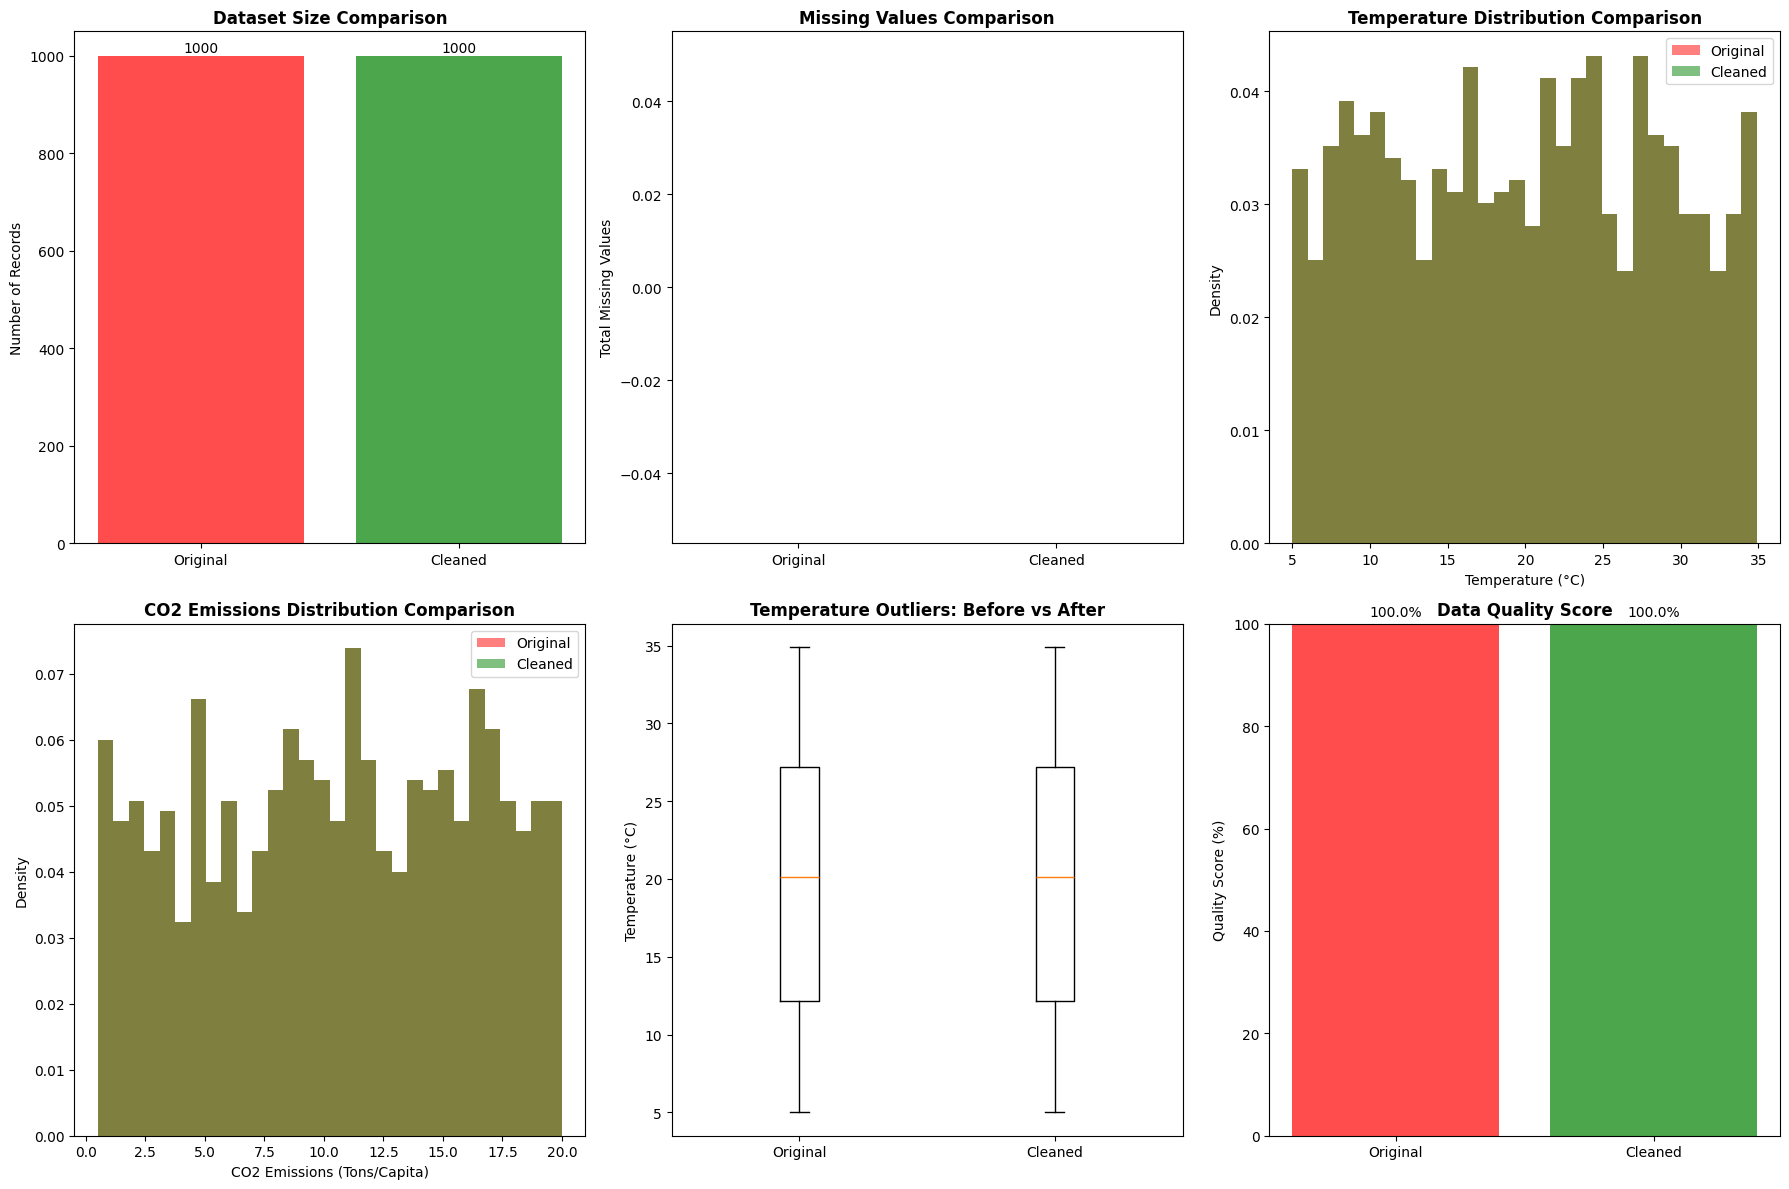

In [36]:

def create_cleaning_plots(df_original, df_clean):
    """Create plots to visualize the cleaning process"""
    print("\n8. Creating data cleaning visualization plots...")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    categories = ['Original', 'Cleaned']
    shapes = [df_original.shape[0], df_clean.shape[0]]
    axes[0, 0].bar(categories, shapes, color=['red', 'green'], alpha=0.7)
    axes[0, 0].set_title('Dataset Size Comparison', fontweight='bold')
    axes[0, 0].set_ylabel('Number of Records')
    for i, v in enumerate(shapes):
        axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

    missing_original = df_original.isnull().sum().sum()
    missing_clean = df_clean.isnull().sum().sum()
    axes[0, 1].bar(['Original', 'Cleaned'], [missing_original, missing_clean],
                   color=['orange', 'blue'], alpha=0.7)
    axes[0, 1].set_title('Missing Values Comparison', fontweight='bold')
    axes[0, 1].set_ylabel('Total Missing Values')

    axes[0, 2].hist(df_original['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[0, 2].hist(df_clean['Avg Temperature (°C)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[0, 2].set_title('Temperature Distribution Comparison', fontweight='bold')
    axes[0, 2].set_xlabel('Temperature (°C)')
    axes[0, 2].set_ylabel('Density')
    axes[0, 2].legend()

    axes[1, 0].hist(df_original['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Original', color='red', density=True)
    axes[1, 0].hist(df_clean['CO2 Emissions (Tons/Capita)'], bins=30, alpha=0.5,
                    label='Cleaned', color='green', density=True)
    axes[1, 0].set_title('CO2 Emissions Distribution Comparison', fontweight='bold')
    axes[1, 0].set_xlabel('CO2 Emissions (Tons/Capita)')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()

    axes[1, 1].boxplot([df_original['Avg Temperature (°C)'], df_clean['Avg Temperature (°C)']],
                       labels=['Original', 'Cleaned'])
    axes[1, 1].set_title('Temperature Outliers: Before vs After', fontweight='bold')
    axes[1, 1].set_ylabel('Temperature (°C)')

    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)

    axes[1, 2].bar(['Original', 'Cleaned'], [original_score, clean_score],
                   color=['red', 'green'], alpha=0.7)
    axes[1, 2].set_title('Data Quality Score', fontweight='bold')
    axes[1, 2].set_ylabel('Quality Score (%)')
    axes[1, 2].set_ylim(0, 100)
    for i, v in enumerate([original_score, clean_score]):
        axes[1, 2].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def calculate_data_quality_score(df):
    """Calculate a simple data quality score"""
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()

    completeness_score = ((total_cells - missing_cells) / total_cells) * 100

    return completeness_score

create_cleaning_plots(df_original, df_clean)



### 10: QUALITY SCORING

In [39]:

def generate_cleaning_report(df_original, df_clean, fixes_applied):
    """Generate a comprehensive cleaning report"""
    print("DATA CLEANING REPORT")

    print(f"\nOriginal dataset shape: {df_original.shape}")
    print(f"Cleaned dataset shape: {df_clean.shape}")
    print(f"Records removed: {df_original.shape[0] - df_clean.shape[0]}")

    print(f"\nMissing values:")
    print(f"  Original: {df_original.isnull().sum().sum()}")
    print(f"  Cleaned: {df_clean.isnull().sum().sum()}")

    print(f"\nDuplicate records:")
    print(f"  Original: {df_original.duplicated().sum()}")
    print(f"  Cleaned: {df_clean.duplicated().sum()}")

    print(f"\nData quality score:")
    original_score = calculate_data_quality_score(df_original)
    clean_score = calculate_data_quality_score(df_clean)
    print(f"  Original: {original_score:.2f}%")
    print(f"  Cleaned: {clean_score:.2f}%")
    print(f"  Improvement: {clean_score - original_score:.2f}%")

    print(f"\nData cleaning actions performed:")
    for fix in fixes_applied:
        print(f"  ✓ {fix}")

    print(f"\nStatistical comparison for key variables:")
    key_vars = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']

    for var in key_vars:
        if var in df_original.columns and var in df_clean.columns:
            print(f"\n  {var}:")
            print(f"    Original - Mean: {df_original[var].mean():.2f}, Std: {df_original[var].std():.2f}")
            print(f"    Cleaned  - Mean: {df_clean[var].mean():.2f}, Std: {df_clean[var].std():.2f}")

generate_cleaning_report(df_original, df_clean, fixes_applied)



DATA CLEANING REPORT

Original dataset shape: (1000, 10)
Cleaned dataset shape: (1000, 10)
Records removed: 0

Missing values:
  Original: 0
  Cleaned: 0

Duplicate records:
  Original: 0
  Cleaned: 0

Data quality score:
  Original: 100.00%
  Cleaned: 100.00%
  Improvement: 0.00%

Data cleaning actions performed:
  ✓ Rounded numerical values to appropriate decimal places

Statistical comparison for key variables:

  Avg Temperature (°C):
    Original - Mean: 19.88, Std: 8.54
    Cleaned  - Mean: 19.88, Std: 8.54

  CO2 Emissions (Tons/Capita):
    Original - Mean: 10.43, Std: 5.61
    Cleaned  - Mean: 10.43, Std: 5.61

  Renewable Energy (%):
    Original - Mean: 27.30, Std: 12.97
    Cleaned  - Mean: 27.30, Std: 12.97


In [40]:
cleaned_file_path = '/content/cleaned_climate_change_dataset.csv'
df.to_csv(cleaned_file_path, index=False)
from google.colab import files
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# 3: Feature Engineering

## 1: Importing Liberaries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import warnings

warnings.filterwarnings('ignore')

## 2; Loading clean dataset

In [45]:

def load_cleaned_data(file_path='climate_change_dataset.csv'):
    """Load the cleaned dataset"""
    print("FEATURE ENGINEERING")

    print("\n1. Loading cleaned dataset...")
    df = pd.read_csv(file_path)
    print(f"✓ Dataset loaded with shape: {df.shape}")
    return df
df_original = load_cleaned_data()


FEATURE ENGINEERING

1. Loading cleaned dataset...
✓ Dataset loaded with shape: (1000, 10)


## 3: Time Feature

In [46]:
def create_time_features(df):
    """Create time-based features"""
    print("\n2. Creating time-based features...")

    df_features = df.copy()

    df_features['Decade'] = (df_features['Year'] // 10) * 10

    min_year = df_features['Year'].min()
    df_features['Years_Since_Start'] = df_features['Year'] - min_year

    def categorize_time_period(year):
        if year < 2005:
            return 'Early_2000s'
        elif year < 2010:
            return 'Mid_2000s'
        elif year < 2015:
            return 'Early_2010s'
        elif year < 2020:
            return 'Late_2010s'
        else:
            return 'Early_2020s'

    df_features['Time_Period'] = df_features['Year'].apply(categorize_time_period)

    print(f"   ✓ Added time features: Decade, Years_Since_Start, Time_Period")
    print(f"   ✓ Decades covered: {sorted(df_features['Decade'].unique())}")

    return df_features
df = create_time_features(df_original)



2. Creating time-based features...
   ✓ Added time features: Decade, Years_Since_Start, Time_Period
   ✓ Decades covered: [np.int64(2000), np.int64(2010), np.int64(2020)]


## 4: Creating categorical features

In [47]:

def create_categorical_features(df):
    """Create categorical features from continuous variables"""
    print("\n3. Creating categorical features...")

    df_features = df.copy()

    def categorize_temperature(temp):
        if temp < 10:
            return 'Cold'
        elif temp < 20:
            return 'Moderate'
        elif temp < 30:
            return 'Warm'
        else:
            return 'Hot'

    df_features['Temperature_Category'] = df_features['Avg Temperature (°C)'].apply(categorize_temperature)

    co2_quantiles = df_features['CO2 Emissions (Tons/Capita)'].quantile([0.33, 0.67])
    def categorize_co2(co2):
        if co2 <= co2_quantiles.iloc[0]:
            return 'Low_CO2'
        elif co2 <= co2_quantiles.iloc[1]:
            return 'Medium_CO2'
        else:
            return 'High_CO2'

    df_features['CO2_Level'] = df_features['CO2 Emissions (Tons/Capita)'].apply(categorize_co2)

    renewable_quantiles = df_features['Renewable Energy (%)'].quantile([0.33, 0.67])
    def categorize_renewable(renewable):
        if renewable <= renewable_quantiles.iloc[0]:
            return 'Low_Renewable'
        elif renewable <= renewable_quantiles.iloc[1]:
            return 'Medium_Renewable'
        else:
            return 'High_Renewable'

    df_features['Renewable_Level'] = df_features['Renewable Energy (%)'].apply(categorize_renewable)

    pop_quantiles = df_features['Population'].quantile([0.25, 0.5, 0.75])
    def categorize_population(pop):
        if pop <= pop_quantiles.iloc[0]:
            return 'Small'
        elif pop <= pop_quantiles.iloc[1]:
            return 'Medium'
        elif pop <= pop_quantiles.iloc[2]:
            return 'Large'
        else:
            return 'Very_Large'

    df_features['Population_Size'] = df_features['Population'].apply(categorize_population)

    print(f"   ✓ Added categorical features: Temperature_Category, CO2_Level, Renewable_Level, Population_Size")

    return df_features
df = create_categorical_features(df)



3. Creating categorical features...
   ✓ Added categorical features: Temperature_Category, CO2_Level, Renewable_Level, Population_Size


## 5: Creating Deriived Features

In [48]:

def create_derived_features(df):
    """Create derived mathematical features"""
    print("\n4. Creating derived features...")

    df_features = df.copy()

    df_features['CO2_per_Population'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Population'] / 1e6

    df_features['Renewable_CO2_Ratio'] = df_features['Renewable Energy (%)'] / (df_features['CO2 Emissions (Tons/Capita)'] + 1)

    df_features['Forest_per_Population'] = df_features['Forest Area (%)'] * 1000000 / df_features['Population']

    df_features['Extreme_Weather_Intensity'] = df_features['Extreme Weather Events'] / (df_features['Population'] / 1e6)

    df_features['Environmental_Pressure'] = (
        df_features['CO2 Emissions (Tons/Capita)'] * df_features['Population'] / 1e6 -
        df_features['Renewable Energy (%)'] -
        df_features['Forest Area (%)']
    )

    df_features['Sea_Level_Impact'] = df_features['Sea Level Rise (mm)'] * df_features['Population'] / 1e6

    df_features['Rainfall_per_Forest'] = df_features['Rainfall (mm)'] / (df_features['Forest Area (%)'] + 1)

    base_year = df_features['Year'].min()
    df_features['Temp_Year_Interaction'] = df_features['Avg Temperature (°C)'] * (df_features['Year'] - base_year)

    df_features['Sustainability_Index'] = (
        df_features['Renewable Energy (%)'] +
        df_features['Forest Area (%)'] -
        df_features['CO2 Emissions (Tons/Capita)'] * 5
    )

    df_features['Climate_Vulnerability'] = (
        df_features['Avg Temperature (°C)'] * 0.3 +
        df_features['Sea Level Rise (mm)'] * 2 +
        df_features['Extreme Weather Events'] * 1.5 -
        df_features['Forest Area (%)'] * 0.1
    )

    df_features['Eco_Economic_Balance'] = (
        df_features['Renewable Energy (%)'] * df_features['Population'] / 1e6 /
        (df_features['CO2 Emissions (Tons/Capita)'] + 1)
    )

    df_features = df_features.replace([np.inf, -np.inf], np.nan)

    numeric_cols = df_features.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_features[col].isna().any():
            df_features[col].fillna(df_features[col].median(), inplace=True)

    print(f"   ✓ Added {12} derived features")
    print(f"   ✓ Key derived features: Environmental_Pressure, Sustainability_Index, Climate_Vulnerability")

    return df_features
df = create_derived_features(df)



4. Creating derived features...
   ✓ Added 12 derived features
   ✓ Key derived features: Environmental_Pressure, Sustainability_Index, Climate_Vulnerability


## 6: Creating Interaction Freatures

In [49]:

def create_interaction_features(df):
    """Create interaction features between important variables"""
    print("\n5. Creating interaction features...")

    df_features = df.copy()

    df_features['Temp_CO2_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['CO2 Emissions (Tons/Capita)']
    df_features['Temp_Renewable_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['Renewable Energy (%)']
    df_features['Temp_Forest_Interaction'] = df_features['Avg Temperature (°C)'] * df_features['Forest Area (%)']

    df_features['CO2_Renewable_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Renewable Energy (%)']
    df_features['CO2_Forest_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * df_features['Forest Area (%)']
    df_features['CO2_Population_Interaction'] = df_features['CO2 Emissions (Tons/Capita)'] * np.log(df_features['Population'] + 1)

    df_features['Renewable_Forest_Interaction'] = df_features['Renewable Energy (%)'] * df_features['Forest Area (%)']
    df_features['Weather_SeaLevel_Interaction'] = df_features['Extreme Weather Events'] * df_features['Sea Level Rise (mm)']

    df_features['Population_Forest_Interaction'] = np.log(df_features['Population'] + 1) * df_features['Forest Area (%)']
    df_features['Population_Renewable_Interaction'] = np.log(df_features['Population'] + 1) * df_features['Renewable Energy (%)']

    df_features['Year_Temp_Trend'] = (df_features['Year'] - df_features['Year'].min()) * df_features['Avg Temperature (°C)']
    df_features['Year_CO2_Trend'] = (df_features['Year'] - df_features['Year'].min()) * df_features['CO2 Emissions (Tons/Capita)']

    print(f"   ✓ Added {12} interaction features")
    print(f"   ✓ Key interactions: Temperature-CO2, CO2-Renewable, Population-Environment")

    return df_features
df = create_interaction_features(df)



5. Creating interaction features...
   ✓ Added 12 interaction features
   ✓ Key interactions: Temperature-CO2, CO2-Renewable, Population-Environment


## 7: Creating Ratio Features

In [50]:

def create_ratio_features(df):
    """Create ratio and relative features"""
    print("\n6. Creating ratio features...")

    df_features = df.copy()

    df_features['Forest_Renewable_Ratio'] = df_features['Forest Area (%)'] / (df_features['Renewable Energy (%)'] + 1)
    df_features['CO2_Forest_Ratio'] = df_features['CO2 Emissions (Tons/Capita)'] / (df_features['Forest Area (%)'] + 1)
    df_features['Renewable_CO2_Ratio'] = df_features['Renewable Energy (%)'] / (df_features['CO2 Emissions (Tons/Capita)'] + 1)

    df_features['Temp_Rainfall_Ratio'] = df_features['Avg Temperature (°C)'] / (df_features['Rainfall (mm)'] / 100)
    df_features['Weather_Population_Ratio'] = df_features['Extreme Weather Events'] / (df_features['Population'] / 1e6)
    df_features['SeaLevel_Forest_Ratio'] = df_features['Sea Level Rise (mm)'] / (df_features['Forest Area (%)'] + 1)

    df_features['Environmental_Efficiency'] = (df_features['Renewable Energy (%)'] + df_features['Forest Area (%)']) / (df_features['CO2 Emissions (Tons/Capita)'] + 1)
    df_features['Population_Efficiency'] = df_features['Population'] / ((df_features['CO2 Emissions (Tons/Capita)'] + 1) * 1e6)

    global_temp_avg = df_features['Avg Temperature (°C)'].mean()
    global_co2_avg = df_features['CO2 Emissions (Tons/Capita)'].mean()
    global_renewable_avg = df_features['Renewable Energy (%)'].mean()

    df_features['Temp_vs_Global'] = df_features['Avg Temperature (°C)'] / global_temp_avg
    df_features['CO2_vs_Global'] = df_features['CO2 Emissions (Tons/Capita)'] / global_co2_avg
    df_features['Renewable_vs_Global'] = df_features['Renewable Energy (%)'] / global_renewable_avg

    print(f"   ✓ Added {11} ratio features")
    print(f"   ✓ Key ratios: Environmental_Efficiency, relative to global averages")

    return df_features
df = create_ratio_features(df)



6. Creating ratio features...
   ✓ Added 11 ratio features
   ✓ Key ratios: Environmental_Efficiency, relative to global averages


## 8: Enciding Categorical Variables

In [51]:
def encode_categorical_variables(df):
    """Encode categorical variables"""
    print("\n7. Encoding categorical variables...")

    df_features = df.copy()
    categorical_cols = ['Country', 'Temperature_Category', 'CO2_Level', 'Renewable_Level',
                       'Population_Size', 'Time_Period']

    ordinal_mappings = {
        'Temperature_Category': {'Cold': 0, 'Moderate': 1, 'Warm': 2, 'Hot': 3},
        'CO2_Level': {'Low_CO2': 0, 'Medium_CO2': 1, 'High_CO2': 2},
        'Renewable_Level': {'Low_Renewable': 0, 'Medium_Renewable': 1, 'High_Renewable': 2},
        'Population_Size': {'Small': 0, 'Medium': 1, 'Large': 2, 'Very_Large': 3},
        'Time_Period': {'Early_2000s': 0, 'Mid_2000s': 1, 'Early_2010s': 2, 'Late_2010s': 3, 'Early_2020s': 4}
    }

    for col, mapping in ordinal_mappings.items():
        if col in df_features.columns:
            df_features[f'{col}_Encoded'] = df_features[col].map(mapping)

    if 'Country' in df_features.columns:
        top_countries = df_features['Country'].value_counts().head(10).index
        for country in top_countries:
            df_features[f'Country_{country}'] = (df_features['Country'] == country).astype(int)

    print(f"   ✓ Encoded categorical variables")
    print(f"   ✓ Added one-hot encoding for top 10 countries")

    return df_features
df = encode_categorical_variables(df)



7. Encoding categorical variables...
   ✓ Encoded categorical variables
   ✓ Added one-hot encoding for top 10 countries


## 9: Creating Aggregated Features

In [52]:

def create_aggregated_features(df):
    """Create aggregated features by country and year"""
    print("\n8. Creating aggregated features...")

    df_features = df.copy()

    def calculate_trend(series):
        """Calculate linear trend slope"""
        if len(series) < 2:
            return 0
        x = np.arange(len(series))
        try:
            slope = np.polyfit(x, series, 1)[0]
            return slope
        except:
            return 0

    country_stats = df_features.groupby('Country').agg({
        'Avg Temperature (°C)': ['mean', 'std', 'min', 'max'],
        'CO2 Emissions (Tons/Capita)': ['mean', 'std'],
        'Renewable Energy (%)': ['mean', 'std'],
        'Forest Area (%)': ['mean', 'std'],
        'Population': ['mean', 'max'],
        'Extreme Weather Events': ['mean', 'sum']
    }).round(3)

    co2_trends = df_features.groupby('Country')['CO2 Emissions (Tons/Capita)'].apply(calculate_trend)
    renewable_trends = df_features.groupby('Country')['Renewable Energy (%)'].apply(calculate_trend)

    country_stats.columns = ['_'.join(col).strip() for col in country_stats.columns]
    country_stats = country_stats.add_prefix('Country_')

    country_stats['Country_CO2_Emissions_(Tons/Capita)_trend'] = co2_trends
    country_stats['Country_Renewable_Energy_(%)_trend'] = renewable_trends

    df_features = df_features.merge(country_stats, left_on='Country', right_index=True, how='left')

    year_stats = df_features.groupby('Year').agg({
        'Avg Temperature (°C)': 'mean',
        'CO2 Emissions (Tons/Capita)': 'mean',
        'Renewable Energy (%)': 'mean',
        'Extreme Weather Events': 'sum'
    }).round(3)

    year_stats = year_stats.add_prefix('Year_Global_')
    df_features = df_features.merge(year_stats, left_on='Year', right_index=True, how='left')

    df_features = df_features.sort_values(['Country', 'Year'])

    for col in ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']:
        df_features[f'{col}_3yr_mean'] = df_features.groupby('Country')[col].rolling(window=3, min_periods=1).mean().values
        df_features[f'{col}_3yr_trend'] = df_features.groupby('Country')[col].rolling(window=3, min_periods=2).apply(
            lambda x: np.polyfit(range(len(x)), x, 1)[0] if len(x) >= 2 else 0
        ).values

    for col in ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Renewable Energy (%)']:
        country_mean_col = f'Country_{col}_mean'
        if country_mean_col in df_features.columns:
            df_features[f'{col}_deviation_from_country_avg'] = df_features[col] - df_features[country_mean_col]

    print(f"   ✓ Added country-level aggregated features")
    print(f"   ✓ Added year-level global features")
    print(f"   ✓ Added rolling statistics and trends")

    return df_features
df = create_aggregated_features(df)



8. Creating aggregated features...
   ✓ Added country-level aggregated features
   ✓ Added year-level global features
   ✓ Added rolling statistics and trends


## 10: Feature Scarling and Normalization

In [55]:

def feature_scaling_and_normalization(df, numerical_features):
    """Apply scaling and normalization to numerical features"""
    print("\n9. Applying feature scaling...")

    df_scaled = df.copy()

    scaler_standard = StandardScaler()
    standard_features = [col for col in numerical_features if 'Encoded' not in col and not col.startswith('Country_')]

    if standard_features:
        df_scaled[standard_features] = scaler_standard.fit_transform(df_scaled[standard_features])
        print(f"   ✓ Applied StandardScaler to {len(standard_features)} features")

    minmax_scaler = MinMaxScaler()
    percentage_features = [col for col in numerical_features if '%' in col or 'Ratio' in col]

    if percentage_features:
        df_scaled[percentage_features] = minmax_scaler.fit_transform(df_scaled[percentage_features])
        print(f"   ✓ Applied MinMaxScaler to {len(percentage_features)} features")

    return df_scaled, scaler_standard, minmax_scaler

def feature_selection_analysis(df):
    """Analyze feature importance and select best features"""
    print("\n10. Analyzing feature importance...")

    target_col = 'Avg Temperature (°C)'
    feature_cols = [col for col in df.columns if col not in [target_col, 'Country', 'Year'] and df[col].dtype in ['int64', 'float64']]

    X = df[feature_cols].fillna(df[feature_cols].median())
    y = df[target_col]

    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(X, y)

    feature_scores = pd.DataFrame({
        'Feature': feature_cols,
        'F_Score': selector.scores_,
        'P_Value': selector.pvalues_
    }).sort_values('F_Score', ascending=False)

    mi_scores = mutual_info_regression(X, y, random_state=42)
    feature_scores['MI_Score'] = mi_scores

    feature_scores['Combined_Score'] = (
        feature_scores['F_Score'] / feature_scores['F_Score'].max() * 0.5 +
        feature_scores['MI_Score'] / feature_scores['MI_Score'].max() * 0.5
    )
    top_features = feature_scores.head(20)

    print(f"   ✓ Analyzed {len(feature_cols)} features")
    print(f"   ✓ Top 10 features by combined score:")
    for idx, row in top_features.head(10).iterrows():
        print(f"      {row['Feature']}: {row['Combined_Score']:.4f}")

    return feature_scores, top_features['Feature'].tolist()
feature_scores, top_features = feature_selection_analysis(df)



10. Analyzing feature importance...
   ✓ Analyzed 86 features
   ✓ Top 10 features by combined score:
      Avg Temperature (°C)_deviation_from_country_avg: 0.5000
      Temperature_Category_Encoded: 0.0383
      Avg Temperature (°C)_3yr_trend: 0.0035
      Temp_Forest_Interaction: 0.0035
      Temp_Renewable_Interaction: 0.0053
      Temp_CO2_Interaction: 0.0079
      Temp_Rainfall_Ratio: 0.0024
      Avg Temperature (°C)_3yr_mean: 0.0019
      Temp_Year_Interaction: 0.0015
      Year_Temp_Trend: 0.0025


## 11: Create Feature Plots


11. Creating feature engineering plots...


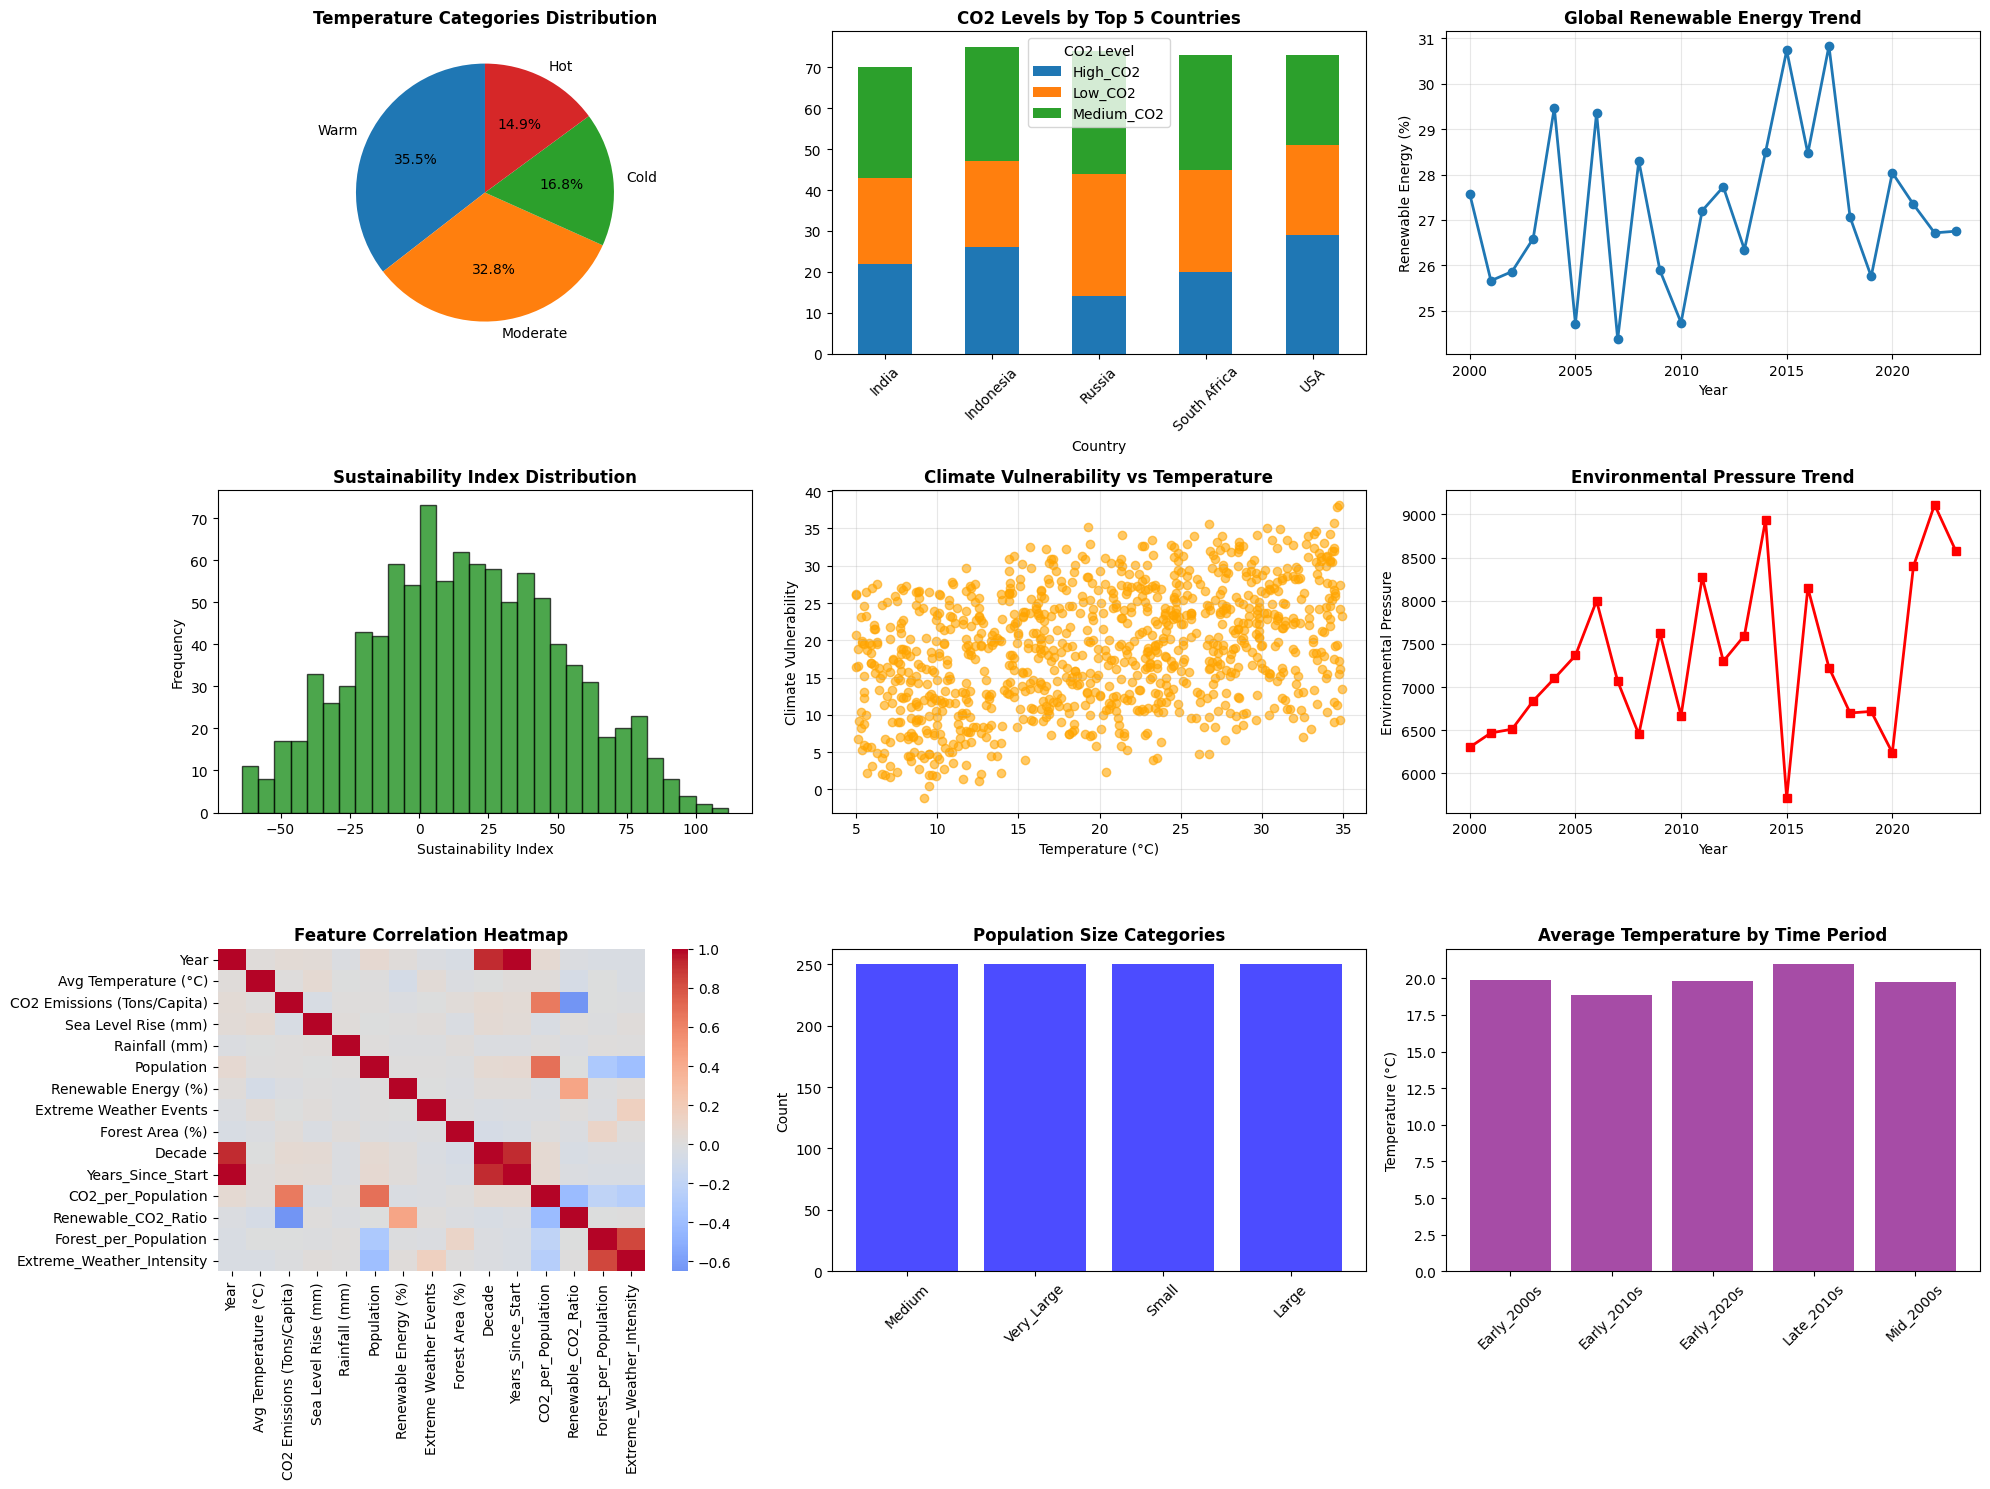

In [56]:

def create_feature_plots(df):
    """Create visualization plots for feature engineering"""
    print("\n11. Creating feature engineering plots...")

    fig, axes = plt.subplots(3, 3, figsize=(20, 15))

    temp_counts = df['Temperature_Category'].value_counts()
    axes[0, 0].pie(temp_counts.values, labels=temp_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Temperature Categories Distribution', fontweight='bold')

    top_countries = df['Country'].value_counts().head(5).index
    co2_by_country = df[df['Country'].isin(top_countries)].groupby(['Country', 'CO2_Level']).size().unstack(fill_value=0)
    co2_by_country.plot(kind='bar', stacked=True, ax=axes[0, 1])
    axes[0, 1].set_title('CO2 Levels by Top 5 Countries', fontweight='bold')
    axes[0, 1].legend(title='CO2 Level')
    axes[0, 1].tick_params(axis='x', rotation=45)

    renewable_trend = df.groupby('Year')['Renewable Energy (%)'].mean()
    axes[0, 2].plot(renewable_trend.index, renewable_trend.values, marker='o', linewidth=2)
    axes[0, 2].set_title('Global Renewable Energy Trend', fontweight='bold')
    axes[0, 2].set_xlabel('Year')
    axes[0, 2].set_ylabel('Renewable Energy (%)')
    axes[0, 2].grid(True, alpha=0.3)

    if 'Sustainability_Index' in df.columns:
        axes[1, 0].hist(df['Sustainability_Index'], bins=30, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_title('Sustainability Index Distribution', fontweight='bold')
        axes[1, 0].set_xlabel('Sustainability Index')
        axes[1, 0].set_ylabel('Frequency')

    if 'Climate_Vulnerability' in df.columns:
        axes[1, 1].scatter(df['Avg Temperature (°C)'], df['Climate_Vulnerability'], alpha=0.6, color='orange')
        axes[1, 1].set_title('Climate Vulnerability vs Temperature', fontweight='bold')
        axes[1, 1].set_xlabel('Temperature (°C)')
        axes[1, 1].set_ylabel('Climate Vulnerability')
        axes[1, 1].grid(True, alpha=0.3)

    if 'Environmental_Pressure' in df.columns:
        env_pressure_trend = df.groupby('Year')['Environmental_Pressure'].mean()
        axes[1, 2].plot(env_pressure_trend.index, env_pressure_trend.values, marker='s', linewidth=2, color='red')
        axes[1, 2].set_title('Environmental Pressure Trend', fontweight='bold')
        axes[1, 2].set_xlabel('Year')
        axes[1, 2].set_ylabel('Environmental Pressure')
        axes[1, 2].grid(True, alpha=0.3)

    numerical_cols = df.select_dtypes(include=[np.number]).columns[:15]  # Limit to avoid clutter
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[2, 0])
    axes[2, 0].set_title('Feature Correlation Heatmap', fontweight='bold')

    if 'Population_Size' in df.columns:
        pop_counts = df['Population_Size'].value_counts()
        axes[2, 1].bar(pop_counts.index, pop_counts.values, color='blue', alpha=0.7)
        axes[2, 1].set_title('Population Size Categories', fontweight='bold')
        axes[2, 1].set_ylabel('Count')
        axes[2, 1].tick_params(axis='x', rotation=45)

    if 'Time_Period' in df.columns:
        time_temp = df.groupby('Time_Period')['Avg Temperature (°C)'].mean()
        axes[2, 2].bar(time_temp.index, time_temp.values, color='purple', alpha=0.7)
        axes[2, 2].set_title('Average Temperature by Time Period', fontweight='bold')
        axes[2, 2].set_ylabel('Temperature (°C)')
        axes[2, 2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
create_feature_plots(df)


## 12: Generationg Feature Report

In [58]:

def generate_feature_report(df_original, df_final):
    """Generate a comprehensive feature engineering report"""
    print("FEATURE ENGINEERING REPORT")

    print(f"\nOriginal dataset:")
    print(f"  Shape: {df_original.shape}")
    print(f"  Features: {df_original.shape[1]}")

    print(f"\nFinal dataset:")
    print(f"  Shape: {df_final.shape}")
    print(f"  Features: {df_final.shape[1]}")
    print(f"  New features added: {df_final.shape[1] - df_original.shape[1]}")

    original_features = set(df_original.columns)
    all_features = set(df_final.columns)
    new_features = all_features - original_features

    feature_categories = {
        'Time Features': [f for f in new_features if any(x in f.lower() for x in ['decade', 'year', 'time', 'period'])],
        'Categorical Features': [f for f in new_features if any(x in f.lower() for x in ['category', 'level', 'size', 'encoded'])],
        'Derived Features': [f for f in new_features if any(x in f.lower() for x in ['ratio', 'index', 'pressure', 'efficiency', 'vulnerability'])],
        'Interaction Features': [f for f in new_features if 'interaction' in f.lower()],
        'Aggregated Features': [f for f in new_features if any(x in f.lower() for x in ['country_', 'year_', '3yr', 'mean', 'std', 'trend'])],
        'Country Encoding': [f for f in new_features if f.startswith('Country_') and not any(x in f for x in ['mean', 'std', 'trend'])],
        'Other Features': []
    }

    classified_features = set()
    for category_features in feature_categories.values():
        classified_features.update(category_features)

    feature_categories['Other Features'] = list(new_features - classified_features)

    print(f"\nFeature categories created:")
    for category, features in feature_categories.items():
        if features:
            print(f"  {category}: {len(features)} features")
            if len(features) <= 5:
                print(f"    Examples: {features}")
            else:
                print(f"    Examples: {features[:5]}...")

    print(f"\nData quality:")
    print(f"  Missing values: {df_final.isnull().sum().sum()}")
    print(f"  Infinite values: {np.isinf(df_final.select_dtypes(include=[np.number])).sum().sum()}")
    print(f"  Duplicate rows: {df_final.duplicated().sum()}")

    memory_original = df_original.memory_usage(deep=True).sum() / 1024**2
    memory_final = df_final.memory_usage(deep=True).sum() / 1024**2
    print(f"\nMemory usage:")
    print(f"  Original: {memory_original:.2f} MB")
    print(f"  Final: {memory_final:.2f} MB")
    print(f"  Increase: {((memory_final - memory_original) / memory_original * 100):.1f}%")

    numerical_features = df_final.select_dtypes(include=[np.number]).columns
    categorical_features = df_final.select_dtypes(include=['object']).columns

    print(f"\nFeature types:")
    print(f"  Numerical features: {len(numerical_features)}")
    print(f"  Categorical features: {len(categorical_features)}")

    key_derived = ['Sustainability_Index', 'Climate_Vulnerability', 'Environmental_Pressure']
    available_key = [f for f in key_derived if f in df_final.columns]

    if available_key:
        print(f"\nKey derived features statistics:")
        for feature in available_key:
            stats = df_final[feature].describe()
            print(f"  {feature}:")
            print(f"    Mean: {stats['mean']:.3f}, Std: {stats['std']:.3f}")
            print(f"    Range: [{stats['min']:.3f}, {stats['max']:.3f}]")

    print(f"\n✓ Feature engineering completed successfully!")
    print(f"✓ Dataset ready for model training with {df_final.shape[1]} features")

    # Feature engineering summary
    summary_stats = {
        'original_features': df_original.shape[1],
        'final_features': df_final.shape[1],
        'new_features': df_final.shape[1] - df_original.shape[1],
        'memory_increase_mb': memory_final - memory_original,
        'missing_values': df_final.isnull().sum().sum()
    }

    print(f"\nFeature Engineering Summary:")
    print(f"Original features: {summary_stats['original_features']}")
    print(f"Final features: {summary_stats['final_features']}")
    print(f"New features added: {summary_stats['new_features']}")
    print(f"Memory increase: {summary_stats['memory_increase_mb']:.2f} MB")
    print(f"Data quality: {df_final.shape[0]} rows, {summary_stats['missing_values']} missing values")
generate_feature_report(df_original, df)


FEATURE ENGINEERING REPORT

Original dataset:
  Shape: (1000, 10)
  Features: 10

Final dataset:
  Shape: (1000, 94)
  Features: 94
  New features added: 84

Feature categories created:
  Time Features: 11 features
    Examples: ['Time_Period_Encoded', 'Temp_Year_Interaction', 'Time_Period', 'Year_Global_Avg Temperature (°C)', 'Year_Global_Renewable Energy (%)']...
  Categorical Features: 12 features
    Examples: ['Time_Period_Encoded', 'Sea_Level_Impact', 'SeaLevel_Forest_Ratio', 'Temperature_Category_Encoded', 'Renewable_Level_Encoded']...
  Derived Features: 11 features
    Examples: ['Temp_Rainfall_Ratio', 'Weather_Population_Ratio', 'Climate_Vulnerability', 'Environmental_Pressure', 'SeaLevel_Forest_Ratio']...
  Interaction Features: 11 features
    Examples: ['Renewable_Forest_Interaction', 'CO2_Forest_Interaction', 'Temp_Year_Interaction', 'Temp_CO2_Interaction', 'Population_Forest_Interaction']...
  Aggregated Features: 42 features
    Examples: ['Country_India', 'Country_Popu